<a href="https://colab.research.google.com/github/RUTUPARNk/musical-carnival/blob/main/Bigram_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
def clean_name(name):
  return ''.join(char for char in name.lower() if char.isalpha())

In [7]:
with open('sample_data/Names.txt', 'r') as file:
  words = [clean_name(line.strip()) for line in file.read().splitlines() if clean_name(line.strip())]

In [8]:
words

['aaban',
 'aabharan',
 'aabhas',
 'aabhat',
 'aabheer',
 'aabheer',
 'abheer',
 'aabher',
 'aabi',
 'aabilesh',
 'aabir',
 'aabishan',
 'aabishayan',
 'aacharya',
 'aachman',
 'aachuthan',
 'aadalalagan',
 'aadalarasan',
 'aadalazhagan',
 'aadamya',
 'aadanyan',
 'aadarko',
 'aadarsh',
 'aadarshan',
 'aadarshanan',
 'aadav',
 'aadavan',
 'aadesh',
 'aadesh',
 'adesh',
 'aadhan',
 'aadhar',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhiban',
 'aadhidev',
 'aadhikeshavan',
 'aadhil',
 'aadhinath',
 'aadhiraiyan',
 'aadhiraj',
 'aadhiran',
 'aadhirayan',
 'aadhiren',
 'aadhisan',
 'aadhiseshwar',
 'aadhish',
 'aadhishankar',
 'aadhishwaran',
 'aadhithan',
 'aadhithiya',
 'aadhithya',
 'aadhithyavarman',
 'aadhithyaa',
 'aadhityan',
 'aadhiyannal',
 'aadhunik',
 'aadhyatm',
 'aadi',
 'aadidev',
 'aadijay',
 'aadil',
 'adil',
 'aadim',
 'aadimoolan',
 'aadinath',
 'aadipta',
 'aadish',
 'aadishankar',
 'aadit',
 'aaditey',
 'aaditeya',
 'aadith',
 'aadithya',
 'aadithyakethu',
 'aaditva',
 'aad

In [9]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [10]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'n'), 26410),
 (('h', 'a'), 18636),
 (('a', '<E>'), 16717),
 (('t', 'h'), 15411),
 (('s', 'h'), 14664),
 (('n', '<E>'), 13778),
 (('a', 'r'), 11221),
 (('r', 'a'), 10972),
 (('i', '<E>'), 9144),
 (('h', 'i'), 8360),
 (('n', 'a'), 8207),
 (('y', 'a'), 7763),
 (('n', 'i'), 7075),
 (('k', 'a'), 6820),
 (('<S>', 'a'), 6774),
 (('v', 'a'), 6228),
 (('m', 'a'), 5851),
 (('a', 's'), 5629),
 (('a', 't'), 5349),
 (('<S>', 's'), 5320),
 (('i', 'n'), 5290),
 (('r', 'i'), 5199),
 (('i', 't'), 4981),
 (('l', 'a'), 4687),
 (('h', '<E>'), 4664),
 (('a', 'a'), 4618),
 (('v', 'i'), 4598),
 (('i', 's'), 4478),
 (('e', 'e'), 4410),
 (('s', 'a'), 4378),
 (('<S>', 'k'), 4321),
 (('<S>', 'v'), 4191),
 (('a', 'm'), 4057),
 (('a', 'l'), 4051),
 (('<S>', 'm'), 3959),
 (('a', 'v'), 3737),
 (('<S>', 'n'), 3607),
 (('e', 's'), 3577),
 (('j', 'a'), 3463),
 (('<S>', 'r'), 3443),
 (('i', 'k'), 3403),
 (('<S>', 'p'), 3356),
 (('d', 'h'), 3141),
 (('<S>', 'd'), 3138),
 (('n', 't'), 3094),
 (('e', 'n'), 3086),


In [11]:
import torch


In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
vocab_size = len(itos)

In [13]:
N = torch.zeros((29, 29), dtype=torch.int32)

In [14]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs[:-1], chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [15]:
stoi


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

((np.float64(-0.5), np.float64(28.5), np.float64(28.5), np.float64(-0.5)),)

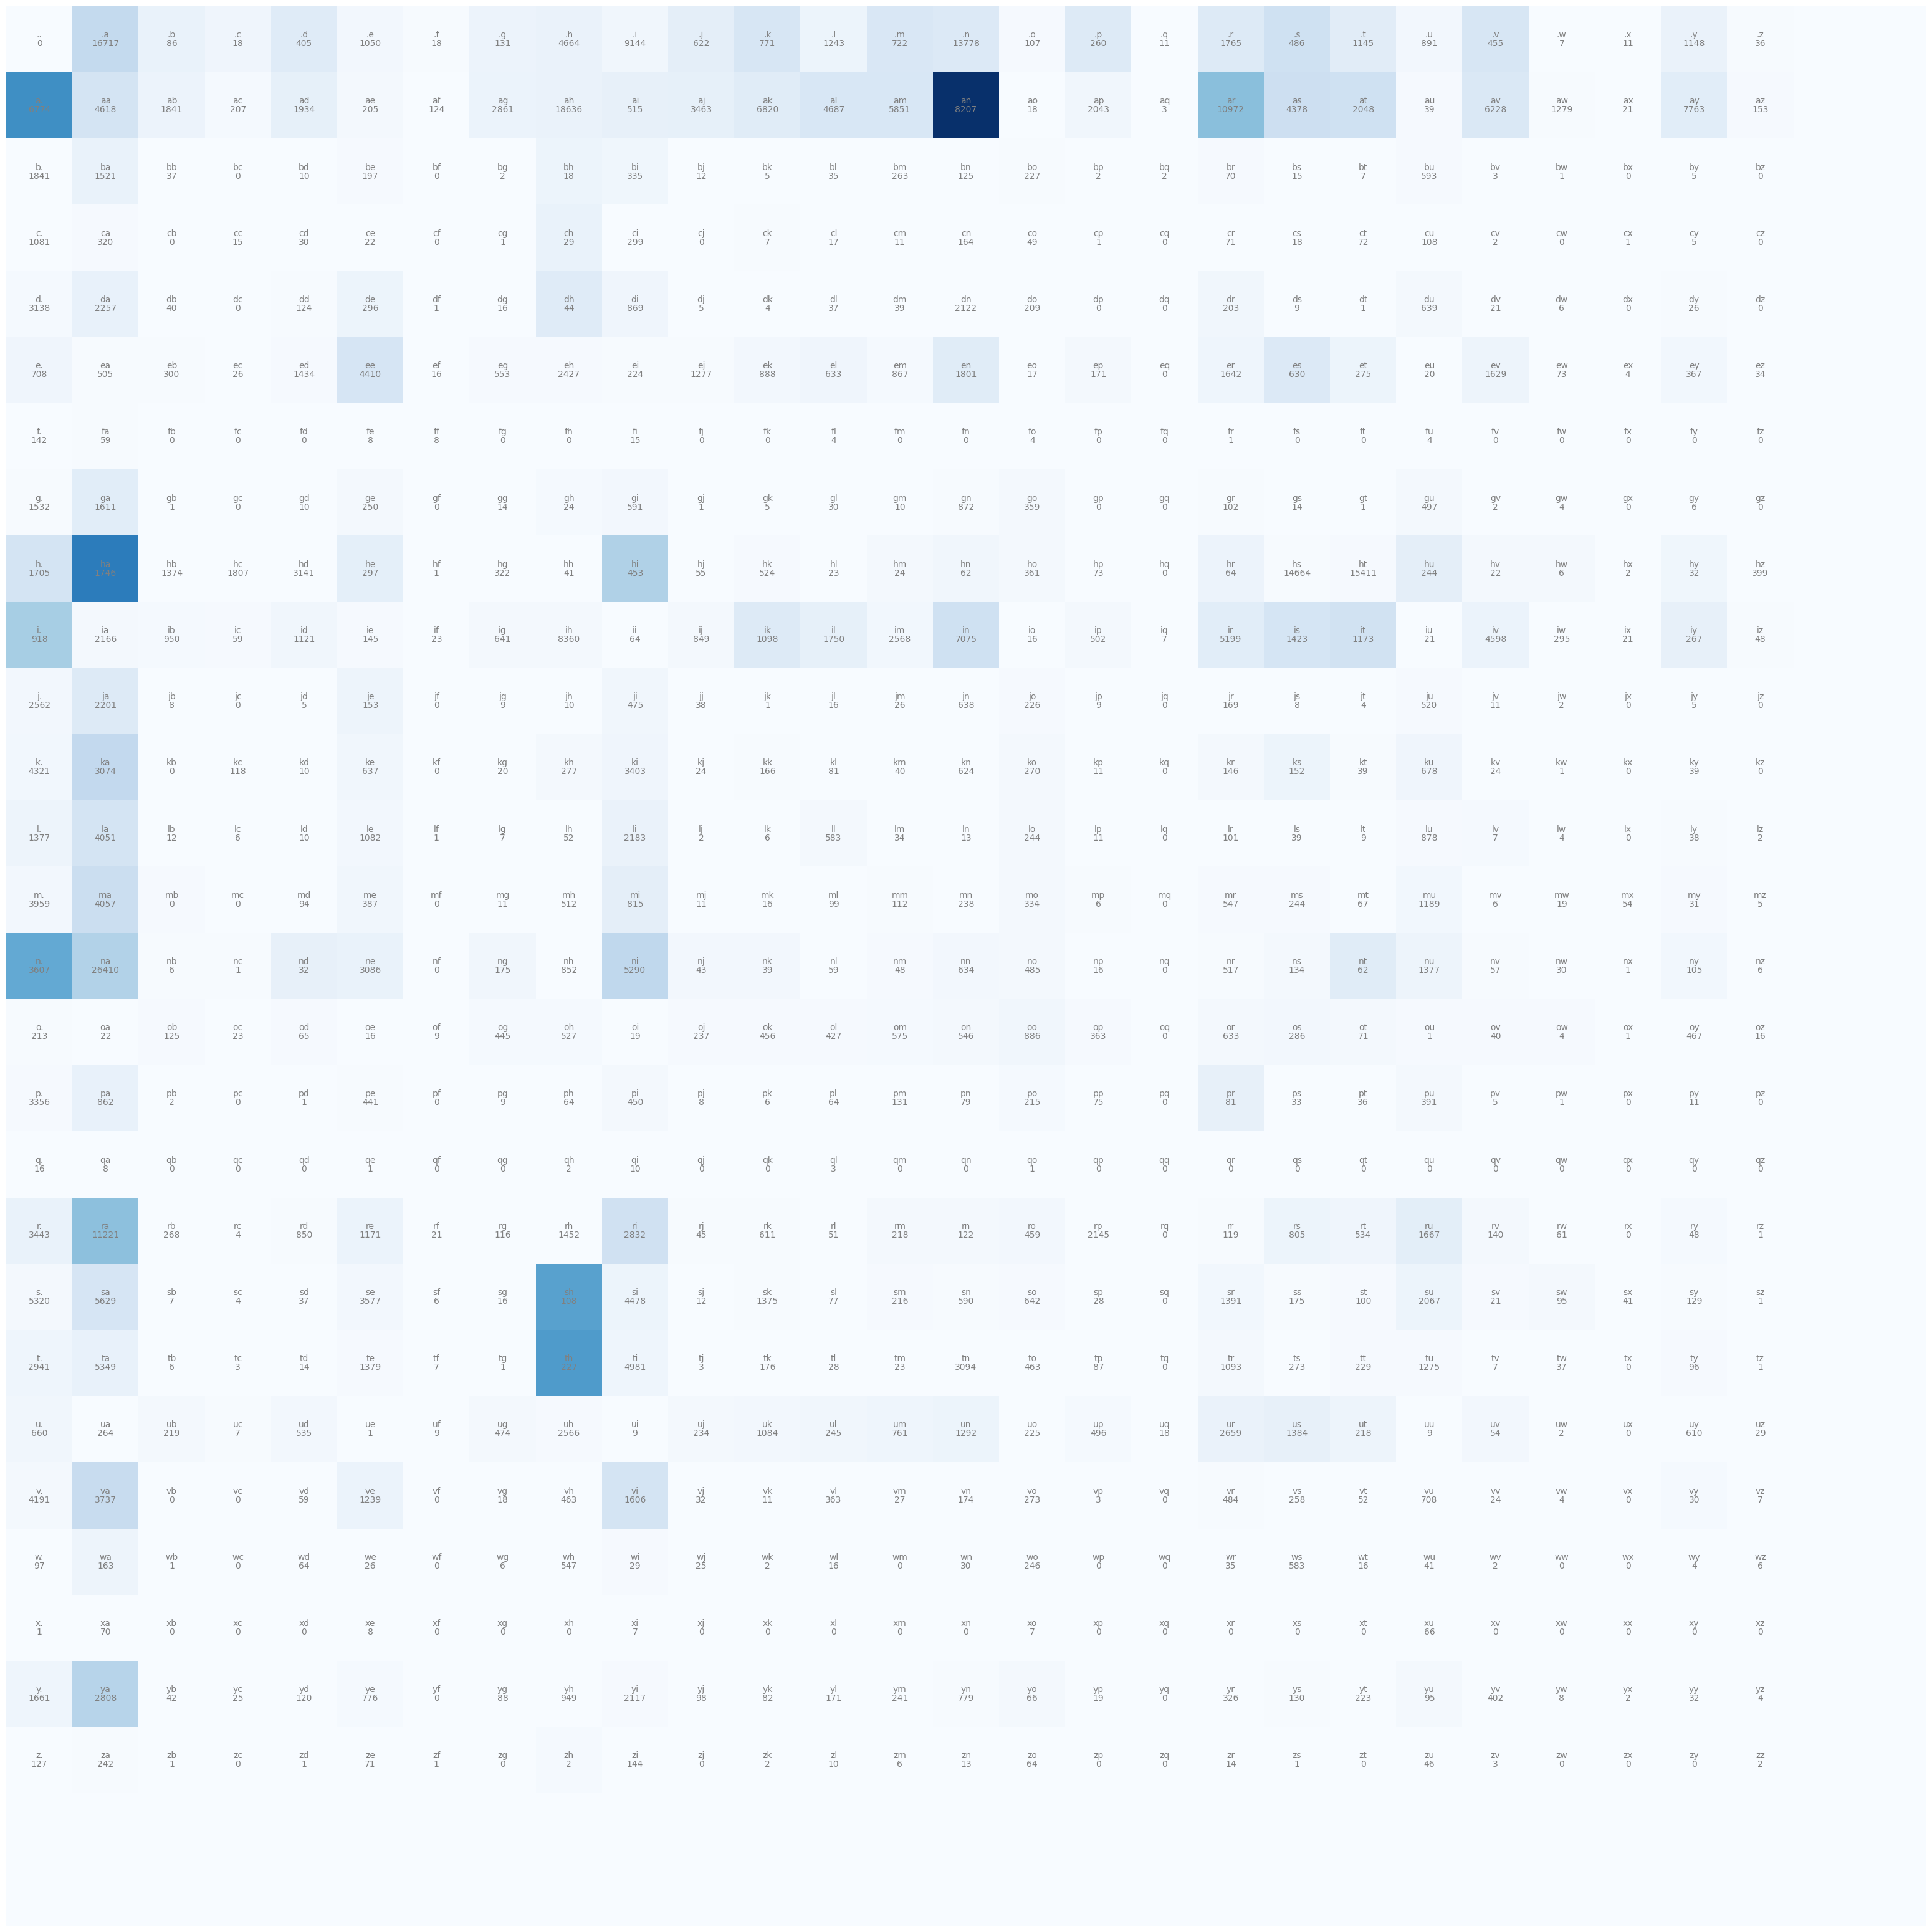

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40, 40))
plt.imshow(N, cmap='Blues')
for i in range(vocab_size):
  for j in range(vocab_size):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    plt.text(i, j, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off'),

In [17]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

NameError: name 'p' is not defined

In [18]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [19]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [20]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [21]:
P.sum(dim=1, keepdim=True).shape
P = P / P.sum(dim=1, keepdim=True)

In [22]:

g = torch.Generator().manual_seed(2147483647)

for i in range(4):

  out = []
  ix = 0
  while True:
    p = N[ix].float()
    #p = torch.ones(vocab_size) / float(vocab_size)
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junidha.
anasar.
prusayanina.
vai.


In [23]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-1103368.8750)
nll=tensor(1103368.8750)
2.1829135417938232
